In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### 1. Read Data From CSV file

Read csv data and parse "dt" as pandas timestamps type data.

In [2]:
df = pd.read_csv("raw_data/GlobalLandTemperaturesByMajorCity.csv", parse_dates=['dt'])
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [3]:
type(df.dt[0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
# Rename column "dt" to "Date" and set the column as it's index. 
df.rename(columns = {'dt':'Date'}, inplace=True)
df.set_index(['Date'], inplace=True)
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
Date,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


### 2. Get General Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239177 entries, 1849-01-01 to 2013-09-01
Data columns (total 6 columns):
AverageTemperature               228175 non-null float64
AverageTemperatureUncertainty    228175 non-null float64
City                             239177 non-null object
Country                          239177 non-null object
Latitude                         239177 non-null object
Longitude                        239177 non-null object
dtypes: float64(2), object(4)
memory usage: 12.8+ MB


In [6]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [7]:
df.City.describe()

count     239177
unique       100
top       Moscow
freq        3239
Name: City, dtype: object

In [8]:
df.Country.describe()

count     239177
unique        49
top        India
freq       36582
Name: Country, dtype: object

### 3. Change Latitude and Longitude Format

In [9]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
Date,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [10]:
df.tail()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
Date,,,,,,
2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E
2013-09-01,NaN,NaN,Xian,China,34.56N,108.97E


In [11]:
type(df.Latitude['1849-01-01'][0])

str

In [12]:
df["Latitude"]  = df.Latitude.map(lambda x : float(str(x)[:-1]) if x[-1]=="N" else -float(str(x)[:-1]))
df["Longitude"] = df.Longitude.map(lambda x : float(str(x)[:-1]) if x[-1]=="E" else -float(str(x)[:-1]))

In [13]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
Date,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23


### 4. Deal With Missing Data

In [30]:
df.isnull().sum()

AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [31]:
df.interpolate(method="time", inplace = True)

### 5. Describe Temperature by City

In [39]:
df_city = df.groupby(['City'])

In [40]:
df_city.describe()

AverageTemperature                                          \
                              count       mean        std     min       25%   
City                                                                          
Abidjan                      1977.0  24.781135   5.732577 -11.476  24.78400   
Addis Abeba                  1965.0  18.524691   3.568301  -9.447  16.68600   
Ahmadabad                    2613.0  25.912387   5.451115  -3.403  22.30800   
Aleppo                       2669.0  18.034196   8.569338   0.670   9.95000   
Alexandria                   2669.0  20.318986   4.561065  10.227  15.98800   
Ankara                       3105.0  11.231964   8.703354  -6.280   3.50500   
Baghdad                      2337.0  22.643164   9.170204   4.236  14.06900   
Bangalore                    2613.0  24.723572   2.610137  -2.074  23.48000   
Bangkok                      2371.0  27.067563   2.045290   3.479  26.19500   
Belo Horizonte               2181.0  21.277224   2.166005  15.920  19.67800   
Berlin                       3239.0   9.316459   7.642788 -10.125   2.76400   
Bogotá                       2277.0  20.752617   2.210583  17.932  19.58100   
Bombay                       2613.0  26.427780   2.554433  -2.074  25.48900   
Brasília                     2181.0  21.907848   1.562515  17.208  21.04100   
Cairo                        2460.0  21.260492   5.587274   9.137  15.88800   
Calcutta                     2613.0  26.013728   4.254617   3.479  22.46100   
Cali                         2265.0  22.383299   1.712134  19.808  21.40700   
Cape Town                    1881.0  16.070834   3.031093   2.689  13.32400   
Casablanca                   3009.0  17.483995   5.826271   6.011  12.39800   
Changchun                    2318.0   4.941651  14.141369 -23.272  -8.00925   
Chengdu                      2318.0  11.570395   7.653715  -2.429   5.10275   
Chicago                      3239.0  10.573907   8.749290  -8.590   2.87450   
Chongqing                    2085.0  16.850721   7.371312   3.354  10.35800   
Dakar                        1977.0  24.130899   4.614320 -18.940  21.70600   
Dalian                       2213.0  10.808773  10.527407  -9.348   0.69000   
Dar Es Salaam                1965.0  25.486140   3.133067  -9.447  24.14500   
Delhi                        2613.0  24.325393   7.670501  -4.154  17.72200   
Dhaka                        2613.0  25.479242   3.919604   3.479  22.53000   
Durban                       1881.0  20.324877   2.065192   2.689  18.59300   
Faisalabad                   2371.0  23.381711   8.357288  -4.154  16.09150   
...                             ...        ...        ...     ...       ...   
New Delhi                    2613.0  24.325393   7.670501  -4.154  17.72200   
New York                     3239.0  10.159814   9.640413  -9.162   1.28450   
Paris                        3239.0  10.769370   6.317547  -3.876   5.39500   
Peking                       2318.0  11.898403  11.172656  -8.579   1.65500   
Pune                         2613.0  24.520781   3.476381  -2.074  22.39900   
Rangoon                      2613.0  26.685285   2.057660   3.479  25.62700   
Rio De Janeiro               2181.0  23.888833   1.891465  18.483  22.38800   
Riyadh                       2049.0  25.291096   7.808449  10.496  18.45500   
Rome                         3239.0  12.297004   7.112241  -2.598   5.88650   
Saint Petersburg             3239.0   4.430918   9.435979 -18.644  -3.32200   
Salvador                     2181.0  24.723058   1.366272  21.005  23.63900   
Santiago                     1901.0   5.702185   4.764567  -3.816   1.35700   
Santo Domingo                2277.0  25.999133   1.304797  22.224  24.95200   
Seoul                        2097.0  10.688487   9.877656  -8.992   1.38000   
Shanghai                     2073.0  15.973640   8.739626  -0.050   7.74600   
Shenyang                     2213.0   7.337289  12.407482 -17.035  -3.70500   
Singapore                    2265.0  26.408193   1.919975 -11.416  

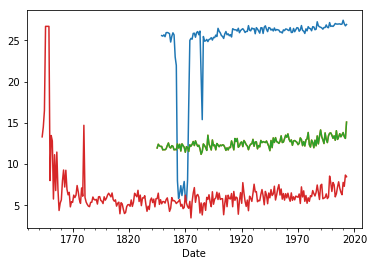

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
df_city.get_group('Abidjan').AverageTemperature.resample('Y').mean().plot()
df_city.get_group('Tokyo').AverageTemperature.resample('Y').mean().plot()
df_city.get_group('Tokyo').AverageTemperature.resample('Y').mean().plot()
df_city.get_group('Toronto').AverageTemperature.resample('Y').mean().plot()